In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from tqdm import tqdm

### Wczytanie danych i przegląd

In [3]:
baza_irysow = load_iris()
X = baza_irysow.data
y = baza_irysow.target  

In [4]:
X[:,(0,2,3)]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Podział zbioru na dane treningowe i testowe + wizualizacja

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.2,
                                                    random_state=0)

len(X_train), len(X_test)

(120, 30)

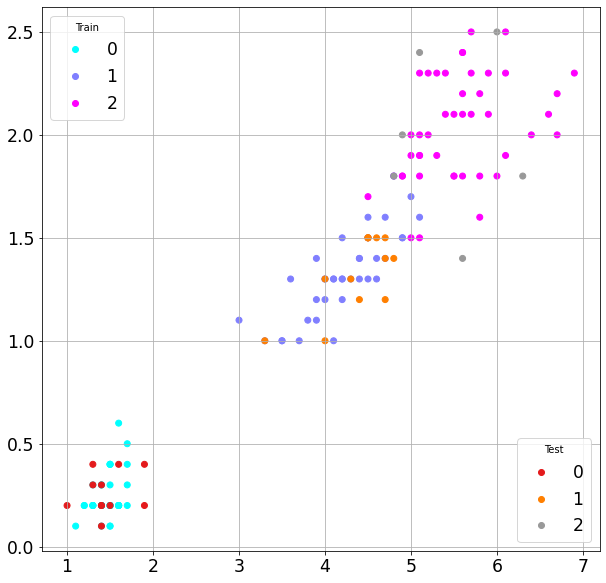

In [111]:
params = {'legend.fontsize': 'xx-large',
           'figure.figsize': (10, 10),
           'axes.labelsize': 'xx-large',
           'axes.titlesize':'xx-large',
           'xtick.labelsize':'xx-large',
           'ytick.labelsize':'xx-large',
           'axes.facecolor':'white'}
plt.rcParams.update(params)

y_dict = {0:'setosa', 1:'versicolor', 2:'virginica'}
y_labeled = [y_dict[x] for x in y_train]

scatter_1 = plt.scatter(X_train[:,2], 
            X_train[:,3], 
            c=y_train, 
            label=['s','v','a'],
            cmap=plt.cm.cool )
scatter_2 = plt.scatter(X_test[:,2], 
            X_test[:,3], 
            c=y_test, 
            cmap=plt.cm.Set1)


legend1 = plt.legend(*scatter_1.legend_elements(), title='Train');
plt.gca().add_artist(legend1)
plt.legend(*scatter_2.legend_elements(), loc='lower right',title='Test');
plt.grid();

### Zależność dokładności predykcji od rozmiaru zbioru uczącego

In [114]:
begin_set_size=5
success_tst = np.zeros(151 - begin_set_size)
success_trn = np.zeros(151 - begin_set_size)

max_depth = 3
min_samples_leaf = 3

for ls in tqdm(range(0,151 - begin_set_size)):
    test_samples_number = int((ls+begin_set_size)*.2)
    k_tst = 0
    k_trn = 0
    for l_sym in range(30*100//test_samples_number):
      objs = np.random.randint(0,150, size=ls+begin_set_size)
      X_1 = X[objs]
      y_1 = y[objs]

      X_train, X_test, y_train, y_test = train_test_split(X_1, 
                                                          y_1, 
                                                          test_size=test_samples_number)

      model = DecisionTreeClassifier(max_depth=max_depth, 
                                     min_samples_leaf=min_samples_leaf)
      model.fit(X_train, y_train)

      y_pred_tst = model.predict(X_test)

      for i in range(len(y_pred_tst)):
        if y_pred_tst[i] == y_test[i]:
          success_tst[ls] += 1
        k_tst += 1
        
      y_pred_trn = model.predict(X_train)

      for i in range(len(y_pred_trn)):
        if y_pred_trn[i] == y_train[i]:
          success_trn[ls] += 1
        k_trn += 1
        
    success_tst[ls] /= k_tst
    success_trn[ls] /= k_trn

100%|█████████████████████████████████████████| 146/146 [00:34<00:00,  4.19it/s]


### Wizualizacja

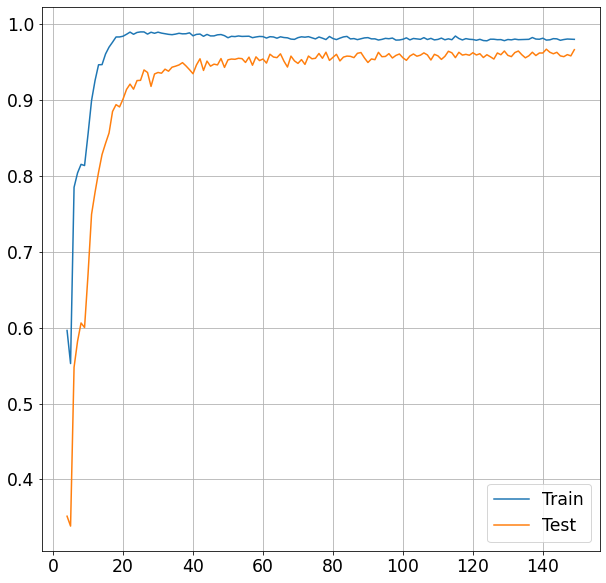

In [116]:
plt.plot(np.arange(4,150), success_trn, label='Train') 
plt.plot(np.arange(4,150), success_tst, label='Test') 
plt.ylim()

plt.legend()
plt.xlabel("Rozmiar zbioru uczącego")
plt.ylabel('Dokładność predykcji')
plt.grid()

### Istotność cech

In [5]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
model.feature_importances_

array([0.        , 0.0125    , 0.55148496, 0.43601504])

In [9]:
model = DecisionTreeClassifier()
model.fit(pd.DataFrame(X_train[:,0:3]), y_train)

DecisionTreeClassifier()

In [10]:
model.feature_importances_

array([0.02138278, 0.04047619, 0.93814103])

In [12]:
import eli5

2021-12-01 13:59:22.021736: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 13:59:22.021783: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
print(model.score(X_test[:,0:3], y_test))

eli5.show_weights(model, 
                  feature_names=['sepal_length', 'petal_length', 'petal_width'],
                  show=["feature_importances"])


0.9


Weight,Feature
0.9381,petal_width
0.0405,petal_length
0.0214,sepal_length
